In [1]:
import pandas as pd
import json
import random
import numpy as np
RANDOM_SEED = 42

In [2]:
a = pd.read_excel("characters_cleaned.xlsx")
a

,mal_id,name,series,genre,rarity,image_url,favorites,about
0,161471,Itsuki Nakano,5-toubun no Hanayome,Anime,3,https://cdn.myanimelist.net/images/characters/...,7844,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter..."
1,161472,Nino Nakano,5-toubun no Hanayome,Anime,3,https://cdn.myanimelist.net/images/characters/...,15036,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter..."
2,161470,Ichika Nakano,5-toubun no Hanayome,Anime,3,https://cdn.myanimelist.net/images/characters/...,3832,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter..."
3,161469,Yotsuba Nakano,5-toubun no Hanayome,Anime,3,https://cdn.myanimelist.net/images/characters/...,5879,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter..."
4,160603,Miku Nakano,5-toubun no Hanayome,Anime,3,https://cdn.myanimelist.net/images/characters/...,21838,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter..."
...,...,...,...,...,...,...,...,...
2349,255515,Elynsia Teos Rave,Yarinaoshi Reijou wa Ryuutei Heika wo Kouryaku...,Anime,1,https://cdn.myanimelist.net/images/characters/...,1,NaN
2350,179681,Ai Mie,Suki na Ko ga Megane wo Wasureta,Anime,3,https://cdn.myanimelist.net/images/characters/...,524,"Ai is an air-headed, pink haired middle-school..."
2351,216166,Yuika Hibuchi,Suki na Ko ga Megane wo Wasureta,Anime,1,https://cdn.myanimelist.net/images/characters/...,10,NaN
2352,216165,Asuka Kawato,Suki na Ko ga Megane wo Wasureta,Anime,1,https://cdn.myanimelist.net/images/characters/...,3,NaN


In [3]:
with open("batch_data.json", "r") as f:
    b = json.load(f)

In [4]:
'''{'mal_id': 161471,
  'name': 'Itsuki Nakano',
  'series': '5-toubun no Hanayome',
  'archetype': 'Ally',
  'stats': {'hp': 105,
   'atk': 95,
   'mag': 92,
   'vit': 98,
   'spr': 110,
   'int': 108,
   'spd': 93,
   'lck': 99},
  'role_potency': {'Buffer': 'B',
   'Healer': 'B',
   'Attacker': 'C',
   'Mage': 'C',
   'Defender': 'C',
   'Debuffer': 'C',
   'Specialist': 'C'},
  'elemental_type': 'Fire',
  'elemental_resistances': {'resist': ['Fire'],
   'neutral': ['Earth', 'Wind', 'Nature', 'Neutral', 'Void', 'Light', 'Dark'],
   'weak': ['Water']}},'''


c = a.copy()
c["archetype"] = None
c["stats"] = None
c["potency"] = None
c["elemental_type"] = None
c["elemental_resistances"] = None

In [5]:
print(len(b))

2354


In [6]:
for i,char in enumerate(b):
    id = char["mal_id"]
    np.random.seed(RANDOM_SEED + i)
    var = np.random.normal(0, 3, len(char["stats"]))
    for j,sts in enumerate(char["stats"]):
        char["stats"][sts] = max(1, min(200, int(char["stats"][sts] + var[j])))
    c.loc[c["mal_id"]==id, "archetype"] = char["archetype"]
    c.loc[c["mal_id"]==id, "stats"] = json.dumps(char["stats"])
    c.loc[c["mal_id"]==id, "potency"] = json.dumps(char["role_potency"])
    c.loc[c["mal_id"]==id, "elemental_type"] = json.dumps(char["elemental_type"])
    c.loc[c["mal_id"]==id, "elemental_resistances"] = json.dumps(char["elemental_resistances"])

In [7]:
#continue and do not output duplicate from the previous output

In [8]:
c

,mal_id,name,series,genre,rarity,image_url,favorites,about,archetype,stats,potency,elemental_type,elemental_resistances
0,161471,Itsuki Nakano,5-toubun no Hanayome,Anime,3,https://cdn.myanimelist.net/images/characters/...,7844,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",Ally,"{""hp"": 96, ""atk"": 89, ""mag"": 101, ""vit"": 94, ""...","{""Mage"": ""C"", ""Attacker"": ""C"", ""Healer"": ""B"", ...","[""neutral""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."
1,161472,Nino Nakano,5-toubun no Hanayome,Anime,3,https://cdn.myanimelist.net/images/characters/...,15036,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",Trickster,"{""hp"": 70, ""atk"": 87, ""mag"": 98, ""vit"": 73, ""s...","{""Mage"": ""C"", ""Attacker"": ""C"", ""Healer"": ""C"", ...","[""fire""]","{""fire"": ""resist"", ""water"": ""weak"", ""earth"": ""..."
2,161470,Ichika Nakano,5-toubun no Hanayome,Anime,3,https://cdn.myanimelist.net/images/characters/...,3832,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",Illusionist,"{""hp"": 67, ""atk"": 83, ""mag"": 103, ""vit"": 65, ""...","{""Mage"": ""C"", ""Attacker"": ""C"", ""Healer"": ""C"", ...","[""wind""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."
3,161469,Yotsuba Nakano,5-toubun no Hanayome,Anime,3,https://cdn.myanimelist.net/images/characters/...,5879,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",Physical Attacker,"{""hp"": 100, ""atk"": 130, ""mag"": 58, ""vit"": 99, ...","{""Mage"": ""F"", ""Attacker"": ""C"", ""Healer"": ""D"", ...","[""nature""]","{""fire"": ""weak"", ""water"": ""neutral"", ""earth"": ..."
4,160603,Miku Nakano,5-toubun no Hanayome,Anime,3,https://cdn.myanimelist.net/images/characters/...,21838,"Birthday: May 5, 2000_x000D_\nAge: 17 (Chapter...",Sage,"{""hp"": 71, ""atk"": 73, ""mag"": 102, ""vit"": 67, ""...","{""Mage"": ""B"", ""Attacker"": ""C"", ""Healer"": ""B"", ...","[""water""]","{""fire"": ""resist"", ""water"": ""resist"", ""earth"":..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,255515,Elynsia Teos Rave,Yarinaoshi Reijou wa Ryuutei Heika wo Kouryaku...,Anime,1,https://cdn.myanimelist.net/images/characters/...,1,NaN,Sage,"{""hp"": 70, ""atk"": 56, ""mag"": 108, ""vit"": 64, ""...","{""Mage"": ""B"", ""Attacker"": ""C"", ""Healer"": ""B"", ...","[""light""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."
2350,179681,Ai Mie,Suki na Ko ga Megane wo Wasureta,Anime,3,https://cdn.myanimelist.net/images/characters/...,524,"Ai is an air-headed, pink haired middle-school...",Oracle,"{""hp"": 64, ""atk"": 50, ""mag"": 102, ""vit"": 59, ""...","{""Mage"": ""D"", ""Attacker"": ""D"", ""Healer"": ""D"", ...","[""void""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."
2351,216166,Yuika Hibuchi,Suki na Ko ga Megane wo Wasureta,Anime,1,https://cdn.myanimelist.net/images/characters/...,10,NaN,Ally,"{""hp"": 89, ""atk"": 91, ""mag"": 89, ""vit"": 87, ""s...","{""Mage"": ""C"", ""Attacker"": ""C"", ""Healer"": ""B"", ...","[""neutral""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."
2352,216165,Asuka Kawato,Suki na Ko ga Megane wo Wasureta,Anime,1,https://cdn.myanimelist.net/images/characters/...,3,NaN,Ally,"{""hp"": 87, ""atk"": 88, ""mag"": 86, ""vit"": 90, ""s...","{""Mage"": ""C"", ""Attacker"": ""C"", ""Healer"": ""B"", ...","[""neutral""]","{""fire"": ""neutral"", ""water"": ""neutral"", ""earth..."


In [9]:
c.to_csv("characters_with_stats.csv", index=False)

In [10]:
d = c.drop(columns = ["about"])
d.sort_values(by=["series"], inplace=True)
d.to_csv("characters_with_stats_for_llm.csv", index=False)

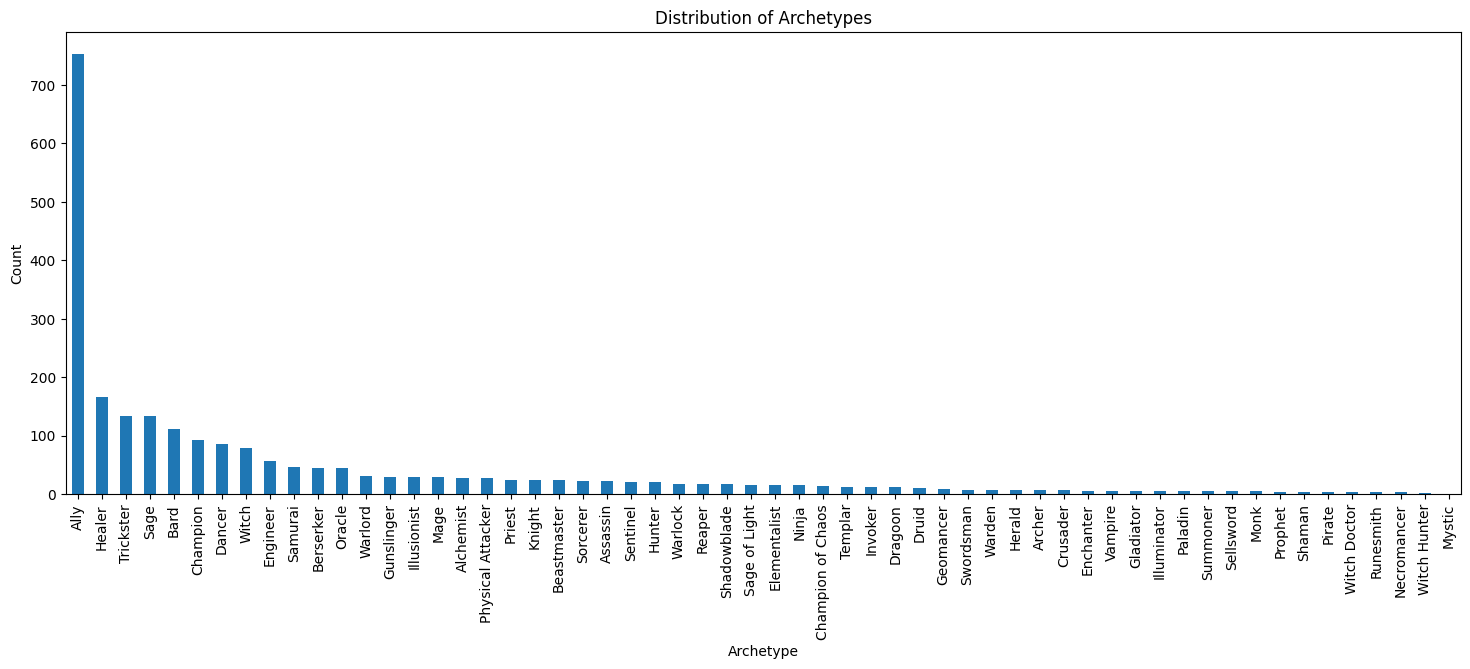

In [11]:
# Plot to see distribution of archetype
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
c["archetype"].value_counts().plot(kind="bar")
plt.title("Distribution of Archetypes")
plt.xlabel("Archetype")
plt.ylabel("Count")
plt.show()